# Name: Dhruv Patel
# dhruv692000@gmail.com


Initializing Libraries

In [1]:
import os
import glob
import csv
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image, ImageOps, ImageFilter
from imageai.Detection import ObjectDetection

D:\Folder\main\Anaconda\envs\envnew\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Folder\main\Anaconda\envs\envnew\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Folder\main\Anaconda\envs\envnew\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Folder\main\Anaconda\envs\envnew\lib\site-packages\tensorflow\python\f

# Part2: creating CSV files

In [2]:


with open('D:/Folder/main/!!Nirma/Sem_4/PSC/ObjectSort/T2.csv','w', newline='') as t2:
    writer= csv.writer(t2, delimiter=',', escapechar=' ', quoting=csv.QUOTE_NONE)
    str= ['Animal, 1','Transport, 2','other, 3','Furniture, 4' ,'Device, 5']

    for i in str:
        writer.writerow([i])

        
with open('D:/Folder/main/!!Nirma/Sem_4/PSC/ObjectSort/T3.csv','w', newline='') as t3:
    writer = csv.writer(t3, delimiter=',', escapechar=' ', quoting=csv.QUOTE_NONE)
    str = ['Dog, 1', 'Cat, 2', 'Bus, 1', 'Car, 2', 'Motercycle, 3', 'Bicycle, 4', 'Pedestrian, 1','Chair, 1', 'Laptop, 1', 'CellPhone, 2']

    for i in str:
        writer.writerow([i])


with open('D:/Folder/main/!!Nirma/Sem_4/PSC/ObjectSort/T4.csv','w', newline='') as t4:
    writer = csv.writer(t4, delimiter=',', escapechar=' ', quoting=csv.QUOTE_NONE)
    str = ['Rotate, 1', 'Gray, 2', 'Sharp, 3', 'Mirror, 4', 'Smooth, 5']

    for i in str:
        writer.writerow([i])

In the above block, we are creating CSV files.

# part3:Reading the image, precessing, and relocating

In [26]:
#initializing required variables and paths
dest = 'D:Folder/main/!!Nirma/Sem_4/PSC/ObjectSort'
max = 0.0
category = ''
tname = 'T'
fileSeq = '1'
otype = ''
process = ''
DicRot={'dog':0, 'cat':0, 'bus':0, 'car':0, 'motorcycle':0, 'bicycle':0, 'person':0, 'chair':0, 'cell phone':0, 'laptop':0}
DicGray={'dog':0, 'cat':0, 'bus':0, 'car':0, 'motorcycle':0,'bicycle':0, 'person':0, 'chair':0, 'cell phone':0, 'laptop':0}
DicShr={'dog':0, 'cat':0, 'bus':0, 'car':0, 'motorcycle':0, 'bicycle':0, 'person':0, 'chair':0, 'cell phone':0, 'laptop':0}
DicMir={'dog':0, 'cat':0, 'bus':0, 'car':0, 'motorcycle':0,'bicycle':0, 'person':0, 'chair':0, 'cell phone':0, 'laptop':0}
DicSmo={'dog':0, 'cat':0, 'bus':0, 'car':0, 'motorcycle':0, 'bicycle':0, 'person':0, 'chair':0, 'cell phone':0, 'laptop':0}
#the list count stores the total number of processing done and identifying each process with its processing code being used as index
count=[0,0,0,0,0]

with open('D:/Folder/main/!!Nirma/Sem_4/PSC/ObjectSort/T1.csv','w', newline='') as t1:
    writer = csv.writer(t1, delimiter=',', escapechar=' ', quoting=csv.QUOTE_NONE)
    stri='SerialNumber, FileName, Path, Type, TypeCode, SubType. SubTypeCode, Processing, ProcessingCode'
    writer.writerow([stri])

#perticular method for each processing(The abbrevation and methodology is same for all the methods so brifly explaining only first)
def rot(path, dest, fname, tname):
    #print('Inside rotate')
    #opening the image as im in the code
    im = Image.open(path)
    #performing the operation
    im = im.rotate(45)
    #splitting the file name from the extension
    lst = fname.split('.')
    #adding suffix to filename as per the operation
    fname = lst[0] + '_Rot45.' + lst[1]
    #according to the operation performed, the destination is being set
    dest = dest + '/Rotate/' + fname
    #print(dest)
    #saving the photo to its appropriate folder
    im.save(dest)
    #adding the code to the 'T' nameing scheme
    tname = tname + '1'
    #specific counter for each separate process
    count[0]+=1
    return im, tname, fname, dest


def gray(path, dest, fname, tname):
    #print('Inside Gray')
    im = Image.open(path)
    im = ImageOps.grayscale(im)
    lst = fname.split('.')
    fname = lst[0] + '_Gray.' + lst[1]
    dest = dest + '/Gray/' + fname
    #print(dest)
    im.save(dest)
    tname = tname + '2'
    count[1] += 1
    return im, tname, fname, dest


def sharp(path, dest, fname, tname):
   # print("inside sharp")
    im = Image.open(path)
    im = im.filter(ImageFilter.SHARPEN)
    lst = fname.split('.')
    fname = lst[0] + '_Sharp.' + lst[1]
    dest = dest + '/Sharpen/' + fname
    #print(dest)
    im.save(dest)
    tname = tname + '3'
    count[2] += 1
    return im, tname, fname, dest


def mir(path, dest, fname, tname):
    #print('inside mirror')
    im = Image.open(path)
    im = ImageOps.mirror(im)
    lst = fname.split('.')
    fname = lst[0] + '_Mirror.' + lst[1]
    dest = dest + '/Mirror/' + fname
    #print(dest)
    im.save(dest)
    tname = tname + '4'
    count[3] += 1
    return im, tname, fname, dest


def smooth(path, dest, fname, tname):
    #print('Inside Smooth')
    im = Image.open(path)
    im = im.filter(ImageFilter.SMOOTH)
    lst = fname.split('.')
    fname = lst[0] + '_Smoothen.' + lst[1]
    dest = dest + '/Smooth/' + fname
    #print(dest)
    im.save(dest)
    tname = tname + '5'
    count[4] += 1
    return im, tname, fname, dest

#os.getcwd will return the current working directory
execution_path = os.getcwd()
#creating object of detection class
detector = ObjectDetection()
#we are using the pretrained model 'RetinaNet'
detector.setModelTypeAsRetinaNet()
#Path to where the random images are
path = "D:/Folder/main/!!Nirma/Sem_4/PSC/Object imagesDemo/*.*"
#path where to dump the output image as we will not be using those
pathdump = "D:/Folder/main/!!Nirma/Sem_4/PSC/Object image Dump"
#path to where the pretrained model file is
detector.setModelPath(os.path.join(execution_path, "C:/Users/dhruv/ObjectDetection/resnet50_coco_best_v2.0.1.h5"))
#loading the model to the object
detector.loadModel()

#this loop will take all the images from the stored folder one-by-one
for file in glob.glob(path):
    #separating the file name from the path
    lst = file.split("\\")
    fname = (lst[int(len(lst)) - 1])
    #adding the name of the file to the dump path
    outpath = pathdump + '/' + fname
    # print('File: '+ file)
    # print('fname: ' + fname)
    # print('Outpath: '+ outpath)
    #This method will process the image and return the values such as its category of belinging and the amount of percentage of its detection
    print('os.path.join(execution_path, file) : '+os.path.join(execution_path, file))
    detections = detector.detectObjectsFromImage(input_image=os.path.join(execution_path, file), output_image_path=os.path.join(execution_path, outpath))
    print(detections)
    #its possible that multiple objects are detected in the single image so here we are checking that which object has the highest percentage 
    #of presence and getting its category
    for eachObject in detections:
        if max < eachObject["percentage_probability"]:
            max = eachObject["percentage_probability"]
            category = eachObject["name"]
        # print(eachObject["name"] , " : " , eachObject["percentage_probability"] )

    #checking the category
    if category == 'motorcycle':
        #adding the appropriate path as per the category of the detected object
        dest1 = dest + '/Transport/Motorcycle'
        #storing the category name to type
        otype = 'Transport'
        # print(dest1)
        #adding the type code and subtype code
        tname = tname + '23'

    if category == 'bus':
        dest1 = dest + '/Transport/Bus'
        otype = 'Transport'
        # print(dest1)
        tname = tname + '21'

    if category == 'car':
        dest1 = dest + '/Transport/Car'
        otype = 'Transport'
        # print(dest1)
        tname = tname + '22'

    if category == 'bicycle':
        dest1 = dest + '/Transport/Bicycle'
        otype = 'Transport'
        # print(dest1)
        tname = tname + '24'

    if category == 'cat':
        dest1 = dest + '/Animal/Cat'
        otype = 'Animal'
        # print(dest1)
        tname = tname + '12'

    if category == 'dog':
        dest1 = dest + '/Animal/Dog'
        otype = 'Animal'
        # print(dest1)
        tname = tname + '11'

    if category == 'person':
        dest1 = dest + '/Other/Pedestrian'
        otype = 'Other'
        # print(dest1)
        tname = tname + '31'

    if category == 'chair':
        dest1 = dest + '/Furniture/Chair'
        otype = 'Furniture'
        # print(dest1)
        tname = tname + '41'

    if category == 'laptop':
        dest1 = dest + '/Device/Laptop'
        otype = 'Device'
        # print(dest1)
        tname = tname + '51'

    if category == 'cell phone':
        dest1 = dest + '/Device/Cell Phone'
        otype = 'Device'
        # print(dest1)
        tname = tname + '52'
        
    #generating random number between 0 to 4 to randomely choodse which processing to apply
    oper = np.random.randint(0,99999) % 5
    #print(oper)
    #checking the random number with the process code
    if oper == 0:
        #calling the method and passing the file path, destination path, filename, and its type
        img, tname, fname, dest = rot(file, dest1, fname, tname)
        #storing that which process is applied
        process = 'Rotate'
        #maintaining the count of process done on any specific type
        DicRot[category]+=1
        #print(DicRot[category])
    if oper == 1:
        img, tname, fname, dest = gray(file, dest1, fname, tname)
        process = 'Gray'
        DicGray[category] += 1
       # print(DicGray[category])
    if oper == 2:
        img, tname, fname, dest = sharp(file, dest1, fname, tname)
        process = 'Sharpen'
        DicShr[category] += 1
        #print(DicShr[category])
    if oper == 3:
        img, tname, fname, dest = mir(file, dest1, fname, tname)
        process = 'Mirror'
        DicMir[category] += 1
       # print(DicMir[category])
    if oper == 4:
        img, tname, fname, dest = smooth(file, dest1, fname, tname)
        process = 'Smooth'
        DicSmo[category] += 1
        #print(DicSmo[category])

    # img.show()
    #creating CSV file t1
    with open('D:/Folder/main/!!Nirma/Sem_4/PSC/ObjectSort/T1.csv', 'a', newline='') as t1:
        writer = csv.writer(t1)
        stri = fileSeq + ',' + fname + ',' + dest + ',' + otype + ',' + tname[:2] + ',' + category + ',' + tname[:3] + ',' + process + ',' + tname
        writer.writerow([stri])

    #print(tname)
    #resetting the variables
    print('Detected: ', fileSeq)
    val = int(fileSeq)
    val+=1
    fileSeq= '{}'.format(val)
    disp = ''
    dest = 'D:Folder/main/!!Nirma/Sem_4/PSC/ObjectSort'
    fname = ''
    category = ''
    max = 0
    tname = 'T'

tracking <tf.Variable 'Variable_70:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_71:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_72:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_73:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_74:0' shape=(9, 4) dtype=float32> anchors
os.path.join(execution_path, file) : D:/Folder/main/!!Nirma/Sem_4/PSC/Object imagesDemo\Bicycle.jpg
[{'name': 'bicycle', 'percentage_probability': 99.90452527999878, 'box_points': [11, 118, 489, 423]}]
Detected:  1
os.path.join(execution_path, file) : D:/Folder/main/!!Nirma/Sem_4/PSC/Object imagesDemo\Bicycle1.jpg


ValueError: Ensure you specified correct input image, input type, output type and/or output image path 

There are 10 images of 10 different types.
As per the basic logic, i'm fetching single image at a time from the origin folder, finding the type and category of the object located in the image, then choosing which processing to be done by calling its specific method and saving the file to its appropriate folder within the method only.

# The code for the part 4A is within the Part 3 as allmost all the data have to be written while processing the loop and at the end of each iteration, the datas are being overwritten.

# Part 4b:Generate statistics based on operation performed

In [4]:
with open('D:/Folder/main/!!Nirma/Sem_4/PSC/ObjectSort/S1.csv', 'w', newline='') as s1:
    writer = csv.writer(s1, delimiter=',', escapechar=' ', quoting=csv.QUOTE_NONE)
    stri = 'Processing, ProcessingCode, Count, List'
    writer.writerow([stri])
    stri = 'Rotate,1,'+str(count[0])+ ',(Dog, '+str(DicRot['dog'])+'),(Cat, '+str(DicRot['cat'])+'),(Bus, '+str(DicRot['bus'])+'),(Car, '+str(DicRot['car'])+'),(Motorcycle,'+str(DicRot['motorcycle'])+'),(Bicycle,'+str(DicRot['bicycle'])+'),(person, '+str(DicRot['person'])+'), (chair,'+str(DicRot['chair'])+'),(cell phone,'+str(DicRot['cell phone'])+'),(laptop,'+str(DicRot['laptop'])+')'
    writer.writerow([stri])
    stri = 'Grey,2,'+str(count[1])+',(Dog,'+str(DicGray['dog'])+'),(Cat,'+str(DicGray['cat'])+'),(Bus,'+str(DicGray['bus'])+'),(Car,'+str(DicGray['car'])+'),(Motorcycle,'+str(DicGray['motorcycle'])+'),(Bicycle,'+str(DicGray['bicycle'])+'),(person,'+str(DicGray['person'])+'), (chair,'+str(DicGray['chair'])+'),(cell phone,'+str(DicGray['cell phone'])+'),(laptop,'+str(DicGray['laptop'])+')'
    writer.writerow([stri])
    stri = 'Sharpen,3,'+str(count[2])+',(Dog,'+str(DicShr['dog'])+'),(Cat,'+str(DicShr['cat'])+'),(Bus,'+str(DicShr['bus'])+'),(Car,'+str(DicShr['car'])+'),(Motorcycle,'+str(DicShr['motorcycle'])+'),(Bicycle,'+str(DicShr['bicycle'])+'),(person,'+str(DicShr['person'])+'), (chair,'+str(DicShr['chair'])+'),(cell phone,'+str(DicShr['cell phone'])+'),(laptop,'+str(DicShr['laptop'])+')'
    writer.writerow([stri])
    stri = 'Mirror,4,'+str(count[3])+',(Dog,'+str(DicMir['dog'])+'),(Cat,'+str(DicMir['cat'])+'),(Bus,'+str(DicMir['bus'])+'),(Car,'+str(DicMir['car'])+'),(Motorcycle,'+str(DicMir['motorcycle'])+'),(Bicycle,'+str(DicMir['bicycle'])+'),(person,'+str(DicMir['person'])+'), (chair,'+str(DicMir['chair'])+'),(cell phone,'+str(DicMir['cell phone'])+'),(laptop,'+str(DicMir['laptop'])+')'
    writer.writerow([stri])
    stri = 'Smooth,5,'+str(count[4])+',(Dog,'+str(DicSmo['dog'])+'),(Cat,'+str(DicSmo['cat'])+'),(Bus,'+str(DicSmo['bus'])+'),(Car,'+str(DicSmo['car'])+'),(Motorcycle,'+str(DicSmo['motorcycle'])+'),(Bicycle,'+str(DicSmo['bicycle'])+'),(person,'+str(DicSmo['person'])+'), (chair,'+str(DicSmo['chair'])+'),(cell phone,'+str(DicSmo['cell phone'])+'),(laptop,'+str(DicSmo['laptop'])+')'
    writer.writerow([stri])


# Part 4c: Generating graph based on type, processing

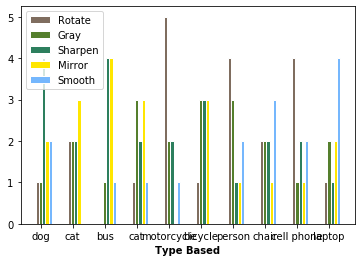

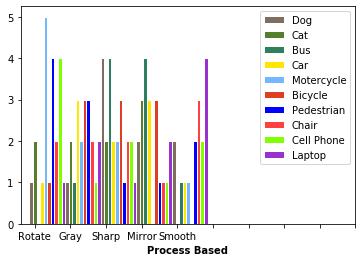

In [6]:

#DicRot={'dog':0, 'cat':0, 'bus':0, 'car':0, 'motorcycle':0, 'bicycle':0, 'person':0, 'chair':0, 'cell phone':0, 'laptop':0}
rotlis=[DicRot['dog'], DicRot['cat'], DicRot['bus'], DicRot['car'], DicRot['motorcycle'], DicRot['bicycle'], DicRot['person'], DicRot['chair'], DicRot['cell phone'], DicRot['laptop']]
graylis=[DicGray['dog'], DicGray['cat'], DicGray['bus'],DicGray['car'],DicGray['motorcycle'], DicGray['bicycle'], DicGray['person'], DicGray['chair'], DicGray['cell phone'], DicGray['laptop']]
shrlis=[DicShr['dog'], DicShr['cat'], DicShr['bus'], DicShr['car'], DicShr['motorcycle'], DicShr['bicycle'], DicShr['person'], DicShr['chair'], DicShr['cell phone'], DicShr['laptop']]
mirlis=[DicMir['dog'], DicMir['cat'],DicMir['bus'], DicMir['car'],DicMir['motorcycle'], DicMir['bicycle'], DicMir['person'], DicMir['chair'], DicMir['cell phone'], DicMir['laptop']]
smolis=[DicSmo['dog'], DicSmo['cat'], DicSmo['bus'], DicSmo['car'], DicSmo['motorcycle'], DicSmo['bicycle'], DicSmo['person'], DicSmo['chair'], DicSmo['cell phone'], DicSmo['laptop']]


barWidth = 0.10
# Set position of bar on X axis
r1 = np.arange(len(rotlis))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

# Making the plot
plt.bar(r1, rotlis, color='#7f6d5f', width=barWidth, edgecolor='white', label='Rotate')
plt.bar(r2, graylis, color='#557f2d', width=barWidth, edgecolor='white', label='Gray')
plt.bar(r3, shrlis, color='#2d7f5e', width=barWidth, edgecolor='white', label='Sharpen')
plt.bar(r4, mirlis, color='#FFE600', width=barWidth, edgecolor='white', label='Mirror')
plt.bar(r5, smolis, color='#75B7FD', width=barWidth, edgecolor='white', label='Smooth')

# Add xticks on the middle of the group bars
plt.xlabel('Type Based', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(rotlis))], ['dog', 'cat', 'bus', 'cat', 'motorcycle','bicycle', 'person','chair','cell phone','laptop'])

# Create legend & Show graphic
plt.legend()
plt.show()


doglist=[rotlis[0], graylis[0], shrlis[0], mirlis[0], smolis[0]]
catlist=[rotlis[1], graylis[1], shrlis[1], mirlis[1], smolis[1]]
buslist=[rotlis[2], graylis[2], shrlis[2], mirlis[2], smolis[2]]
carlist=[rotlis[3], graylis[3], shrlis[3], mirlis[3], smolis[3]]
motlist=[rotlis[4], graylis[4], shrlis[4], mirlis[4], smolis[4]]
biclist=[rotlis[5], graylis[5], shrlis[5], mirlis[5], smolis[5]]
perlist=[rotlis[6], graylis[6], shrlis[6], mirlis[6], smolis[6]]
chrlist=[rotlis[7], graylis[7], shrlis[7], mirlis[7], smolis[7]]
cellist=[rotlis[8], graylis[8], shrlis[8], mirlis[8], smolis[8]]
laplist=[rotlis[9], graylis[9], shrlis[9], mirlis[9], smolis[9]]

r1 = np.arange(len(doglist))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]
r9 = [x + barWidth for x in r8]
r10 = [x + barWidth for x in r9]

# Make the plot
plt.bar(r1, doglist, color='#7f6d5f', width=barWidth, edgecolor='white', label='Dog')
plt.bar(r2, catlist, color='#557f2d', width=barWidth, edgecolor='white', label='Cat')
plt.bar(r3, buslist, color='#2d7f5e', width=barWidth, edgecolor='white', label='Bus')
plt.bar(r4, carlist, color='#FFE600', width=barWidth, edgecolor='white', label='Car')
plt.bar(r5, motlist, color='#75B7FD', width=barWidth, edgecolor='white', label='Motercycle')
plt.bar(r6, biclist, color='#DE3F24', width=barWidth, edgecolor='white', label='Bicycle')
plt.bar(r7, perlist, color='#0000FF', width=barWidth, edgecolor='white', label='Pedestrian')
plt.bar(r8, chrlist, color='#FF4040', width=barWidth, edgecolor='white', label='Chair')
plt.bar(r9, cellist, color='#7FFF00', width=barWidth, edgecolor='white', label='Cell Phone')
plt.bar(r10, laplist, color='#9932CC', width=barWidth, edgecolor='white', label='Laptop')

# Add xticks on the middle of the group bars
plt.xlabel('Process Based', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(rotlis))], ['Rotate', 'Gray', 'Sharp', 'Mirror', 'Smooth'])

# Create legend & Show graphic
plt.legend()
plt.show()